1)DATA COLLECTION

In [33]:
import pandas as pd
data=pd.read_csv('Backpacks.csv')

In [34]:
#----Cheacking for missing values----
data.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           1433
no_of_ratings     1433
discount_price     327
actual_price        64
dtype: int64

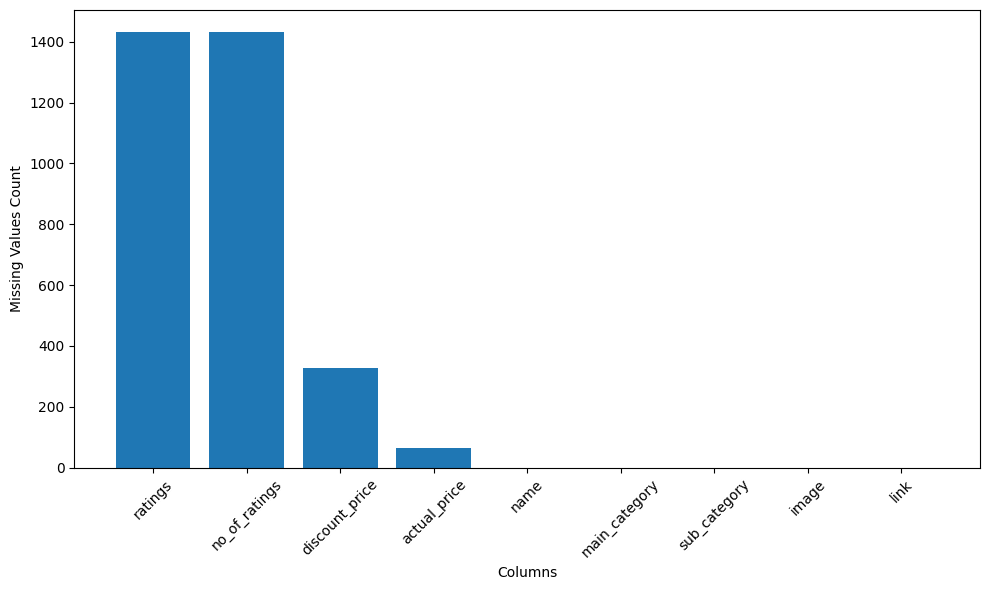

In [35]:
#Plot graph for missing values
import matplotlib.pyplot as plt
missing_count=data.isnull().sum()
plt.figure(figsize=(10,6))
sort_missing_count=missing_count.sort_values(ascending=False)
plt.bar(sort_missing_count.index,sort_missing_count.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2)DATA CLEANING

In [36]:
#checking ratings column
data['ratings'].unique()


array(['4.1', '4.0', '4.3', '3.9', '3.7', '3.8', '4.2', '4.4', '3.6',
       '4.5', '4.6', '5.0', '3.5', '3.0', nan, '3.1', '2.0', '3.2', '1.0',
       '3.3', '4.8', '2.9', '4.7', '3.4', '4.9', '2.4', '2.6', '2.5',
       'FREE', '1.4', '1.5', '2.8'], dtype=object)

In [37]:
# Filter and drop rows where 'ratings' is 'FREE'
data = data[data['ratings'] != 'FREE']
#convert non numeric and null values to nan
data['ratings']=pd.to_numeric(data['ratings'],errors='coerce')
#fill nan to mean
data['ratings'].fillna(data['ratings'].mean(),inplace=True)
#finally convert to float
data['ratings']=data['ratings'].astype(float)

In [38]:
#Now check the rating column again
data['ratings'].unique()
data['ratings'] = data['ratings'].round(2)

array([4.1       , 4.        , 4.3       , 3.9       , 3.7       ,
       3.8       , 4.2       , 4.4       , 3.6       , 4.5       ,
       4.6       , 5.        , 3.5       , 3.        , 3.95304659,
       3.1       , 2.        , 3.2       , 1.        , 3.3       ,
       4.8       , 2.9       , 4.7       , 3.4       , 4.9       ,
       2.4       , 2.6       , 2.5       , 1.4       , 1.5       ,
       2.8       ])

In [40]:
#correcting no_of_ratings column
#convert non numeric & null values to nan
data['no_of_ratings']=pd.to_numeric(data['no_of_ratings'],errors='coerce')
#fill nan with mean
data['no_of_ratings'].fillna(data['no_of_ratings'].mean(),inplace=True)
#finally convert to int
data['no_of_ratings']=data['no_of_ratings'].astype(int)

In [41]:
data.no_of_ratings.unique()

array([ 91, 894,   7, 381, 554, 199, 711, 349,  92, 302, 492, 672,  54,
       366, 176, 298, 133, 921, 969,  75,  35, 421, 193,  23, 287,  73,
       468,  44, 940,   1,  28,  29, 915,  84, 285,   6, 306,  43, 724,
       877,  14, 418, 477,  45, 110,  16,   3, 219,  55, 693, 325, 957,
         2, 475, 304, 270, 122, 155, 114,   9,  42,  64,   4, 128, 135,
        38,  30,  27,  24,  25, 186,  34, 491, 290,  96, 174, 227, 548,
        41,  87, 218,  10,  13, 163, 636,  80,  67,  12,  86,  56, 152,
        20, 139, 215,  98,  65, 117, 362, 356,  69,  82, 171, 134, 991,
        37, 801, 111, 338,  60,  83, 100,  66,   8, 584,  59, 161, 213,
        31, 331, 414, 410, 104,   5, 118, 714,  11, 245,  50,  77, 126,
       105,  26, 169,  49, 132,  17, 520,  74,  19, 158,  90, 525, 531,
       210, 141, 443,  51, 119,  62, 192, 124, 562,  18, 816, 780,  15,
        68, 151, 144,  48, 734,  53, 370, 411,  40, 168, 383,  99, 608,
       154, 294,  63, 573,  97])

In [42]:
#----Data standardization----
#remove rupees symbols and commas from 'actual_price' and 'discount_price' colums
data['actual_price']=data['actual_price'].str.replace('[₹,]','',regex=True)
data['discount_price']=data['discount_price'].str.replace('[₹,]','',regex=True)
#convert to float
data['actual_price']=data['actual_price'].astype(float)
data['discount_price']=data['discount_price'].astype(float)

In [43]:
#fill nan of last two columns with means
numeric_variables=['discount_price','actual_price']
means=data[numeric_variables].mean()
data[numeric_variables]=data[numeric_variables].fillna(means)

3)DATA FEATURING

In [44]:
#Create new feature 'manufacturer' from names column
#get manufacturer name from the first word from the name column
data['manufacturer'] = data['name'].str.split(' ').str[0]


In [45]:
#DATA FEATURING
#add discount value and discount percent column
data['discount_value']=data['actual_price']-data['discount_price']
data['discount_percent']=1-data['discount_price']/data['actual_price']
data

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discount_percent
0,Skybags Brat Black 46 Cms Casual Backpack,bags & luggage,Backpacks,https://m.media-amazon.com/images/I/810s53kR8t...,https://www.amazon.in/Skybags-Brat-Black-Casua...,4.10,91,659.0,2100.0,Skybags,1441.0,0.686190
1,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,bags & luggage,Backpacks,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.00,91,299.0,799.0,SAFARI,500.0,0.625782
2,Wesley Milestone 2.0 Casual Waterproof Laptop ...,bags & luggage,Backpacks,https://m.media-amazon.com/images/I/811AxL+qTp...,https://www.amazon.in/Wesley-Milestone-Waterpr...,4.30,91,565.0,1199.0,Wesley,634.0,0.528774
3,Gear Aspire 30L Water Restant Office Laptop Ba...,bags & luggage,Backpacks,https://m.media-amazon.com/images/I/81BCsKS7Wu...,https://www.amazon.in/Gear-Black-Laptop-Backpa...,4.30,91,1131.0,2899.0,Gear,1768.0,0.609865
4,"Genie Iridescence School Bag for Girls, 17 inc...",bags & luggage,Backpacks,https://m.media-amazon.com/images/I/71HWNZIjMv...,https://www.amazon.in/Genie-Iridescence-Multic...,4.00,91,899.0,2339.0,Genie,1440.0,0.615648
...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Stylish Backpack,bags & luggage,Backpacks,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Fanex-Stylish-Backpack/d...,3.95,91,299.0,599.0,Stylish,300.0,0.500835
2060,Stylish and Fashionable red Backpack 01,bags & luggage,Backpacks,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Stylish-Fashionable-red-...,3.95,91,299.0,599.0,Stylish,300.0,0.500835
2061,Stylish and Fashionable aliado Backpack,bags & luggage,Backpacks,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Stylish-and-Fashionable-...,3.95,91,299.0,599.0,Stylish,300.0,0.500835
2062,TIRTHAK 6 Person Tent for Camping Waterproof O...,bags & luggage,Backpacks,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/TIRTHAK-Camping-Waterpro...,3.95,91,1749.0,1900.0,TIRTHAK,151.0,0.079474


In [46]:
#lets check the unique manufacturer
data.manufacturer.unique()

array(['Skybags', 'SAFARI', 'Wesley', 'Gear', 'Genie', 'FUR', 'Safari',
       'Half', 'American', 'ADISA', 'Zipline', 'Mi', 'FATMUG', "Lunar's",
       'Fur', 'Lenovo', 'ShopyVid®', 'Artistix', 'Glowic', 'Red', 'F',
       'POLICE', 'Carbonado', 'Wildcraft', 'Aristocrat', 'PUMA',
       'Tripole', 'Vezela', 'ASUS', 'Tinytot', 'TRAWOC', 'Trunkit',
       'POLESTAR', 'PALAY', 'Puma', 'Lavie', 'Impulse', 'Urban', 'Zibuyu',
       'Tabelito®', 'COSMUS', 'KRISMO', 'TYPIFY®', 'SKYBAGS',
       'Aristrocrat', 'Harissons', 'Samsonite', 'BANGE', 'Medium',
       'Jeton', 'HP', 'Hummel', 'Fly', 'Tommy', 'Flash', 'Northzone',
       'high', 'MOBOPHONO', 'Vanguard', 'MOBIUS', 'JB', 'Lino', 'Nishi®',
       'ShopyVid', 'KILLER', 'Mount', 'Nike', 'OPTIMA', 'Hidesign',
       'Good', 'D', 'ASTRID', 'The', 'Vaya', 'Laptop', 'Fastrack',
       'Runilex', 'Baggit', 'HOT', 'Hammonds', 'JBRACING', 'FunClub',
       'Okami', 'Alokik', 'DAIWA', "Kumar's", 'Tatuaa', 'Nillion',
       'Shrisay', 'uppercase',

In [47]:
#we will change some of the manufacturer names which are not properly taken 
data.manufacturer=data.manufacturer.replace('F','F Gear')
data.manufacturer=data.manufacturer.replace('FUR','FUR JADEN')
data.manufacturer=data.manufacturer.replace('Fur','FUR JADEN')
data.manufacturer=data.manufacturer.replace('Half','Half Moon')
data.manufacturer=data.manufacturer.replace('American','American Tourister')
data.manufacturer=data.manufacturer.replace('Red','Red Lemon')
data.manufacturer=data.manufacturer.replace('Tommy','Tommy Hilfiger')
data.manufacturer=data.manufacturer.replace('Good','Good Friends')
data.manufacturer=data.manufacturer.replace('Swiss','Swiss Military')
data.manufacturer=data.manufacturer.replace('SKYBAGS','Skybags')
data.manufacturer=data.manufacturer.replace('SAFARI','Safari')


In [67]:
#Through the above graph we get to know that discount values is negative i.e discount_price is more than actual_price 
# Iterate through the DataFrame and swap values
for index, row in data.iterrows():
    if row['discount_price'] > row['actual_price']:
        data.at[index, 'actual_price'], data.at[index, 'discount_price'] = data.at[index, 'discount_price'], data.at[index, 'actual_price']
#Finally,recalculate the discount_value and percent
data['discount_value']=data['actual_price']-data['discount_price']
data['discount_percent']=1-data['discount_price']/data['actual_price']


4)DATA EXPLORATION

In [70]:
#----descriptive statistics----
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,3.950854,91.037670,1729.079428,3480.283917,1751.204489,0.483191
std,0.452827,92.392527,3061.146175,6020.493793,3406.036451,0.170027
min,1.000000,1.000000,99.000000,250.000000,1.000000,0.000111
25%,3.950000,91.000000,600.000000,1399.000000,649.000000,0.375352
50%,3.950000,91.000000,999.000000,1999.000000,1000.000000,0.500000
75%,3.950000,91.000000,1758.498504,3450.864842,1692.366338,0.600601
max,5.000000,991.000000,98499.000000,194499.000000,96000.000000,0.959116


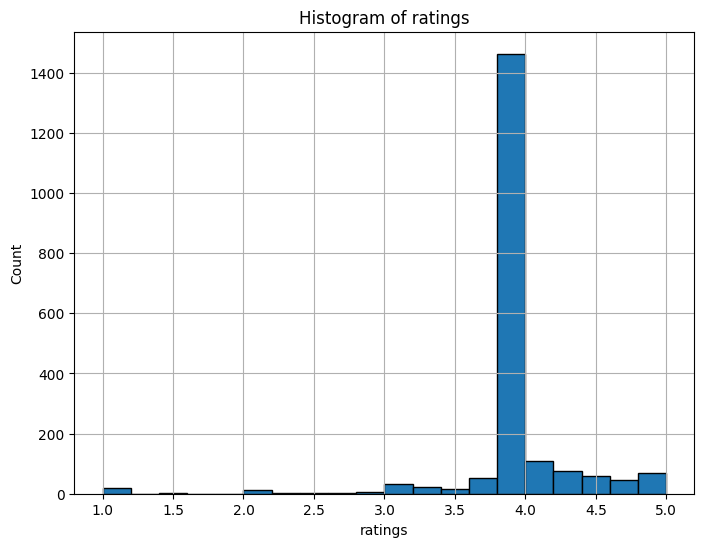

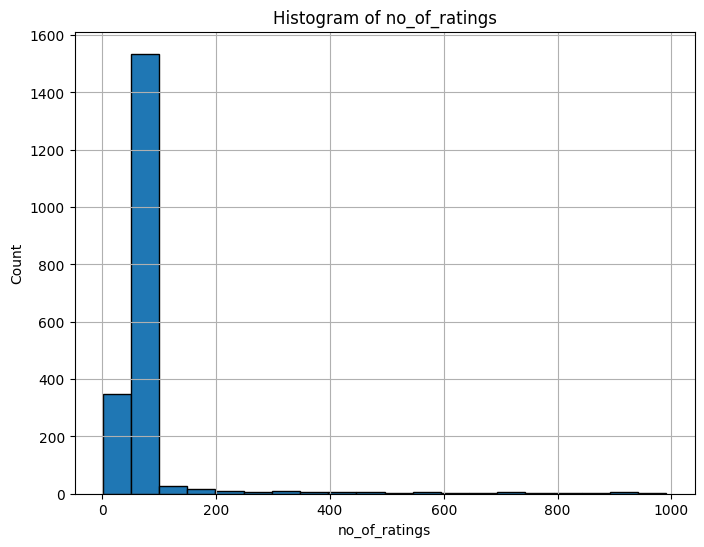

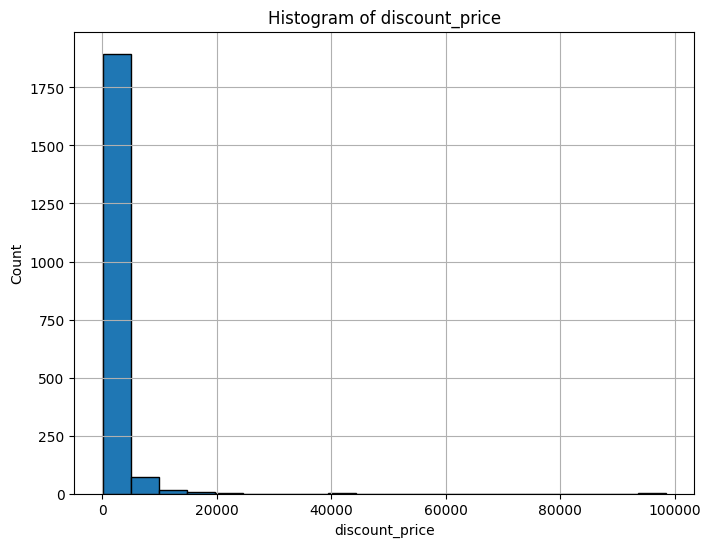

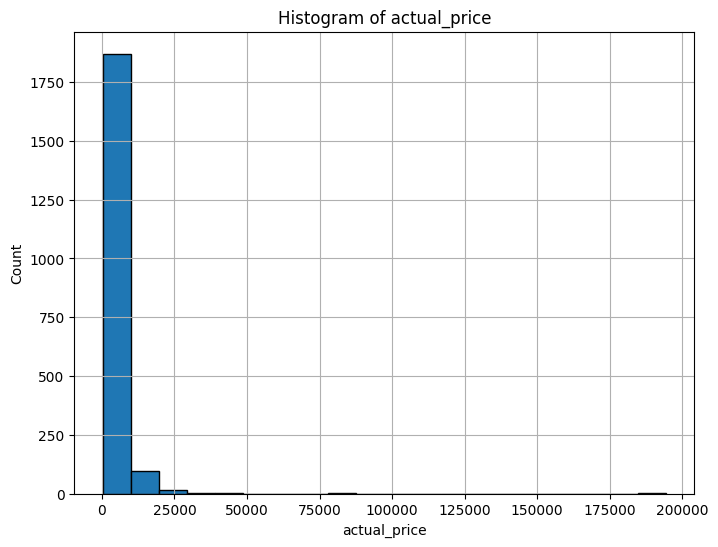

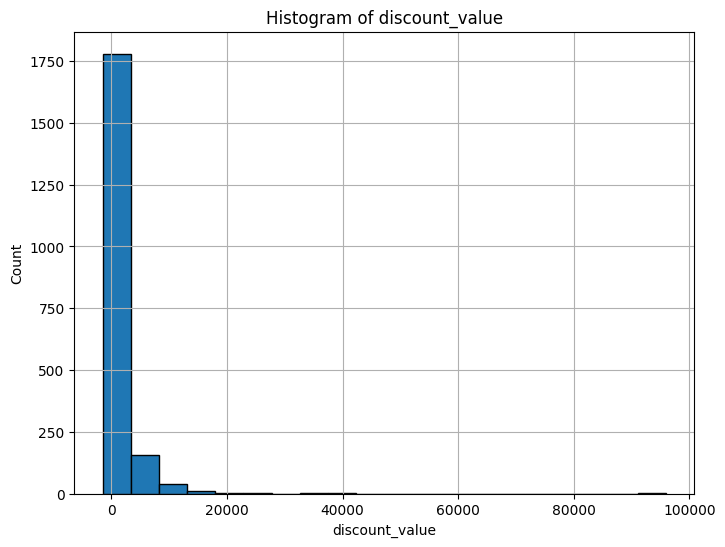

In [ ]:
#data visualisation
import matplotlib.pyplot as plt
numerical_variables = ["ratings", "no_of_ratings", "discount_price", "actual_price",'discount_value']
# Plot histograms for numerical variables
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data[var], bins=20, edgecolor='k')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid()
    plt.show()

In [ ]:
5)DATA VISULAIZATION

In [71]:
#Top 10 manufacturer
top_10=data['manufacturer'].value_counts().sort_values(ascending=False).head(10)
print('Top 10 best selling companies')
print(top_10)

Top 10 best selling companies
manufacturer
Generic      145
Backpack     100
GADGETS       47
Calandis      43
UJEAVETTE     36
Layfuz        35
F Gear        33
VOXX          27
Skybags       24
Qunan         21
Name: count, dtype: int64


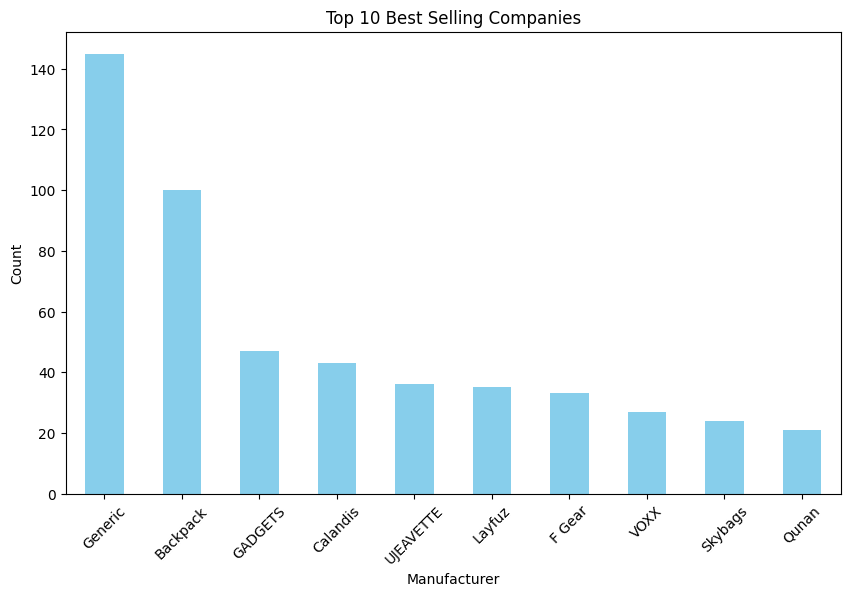

In [72]:
# Create a barplot for the top 10 best-selling companies
plt.figure(figsize=(10, 6))

t=top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best Selling Companies')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()


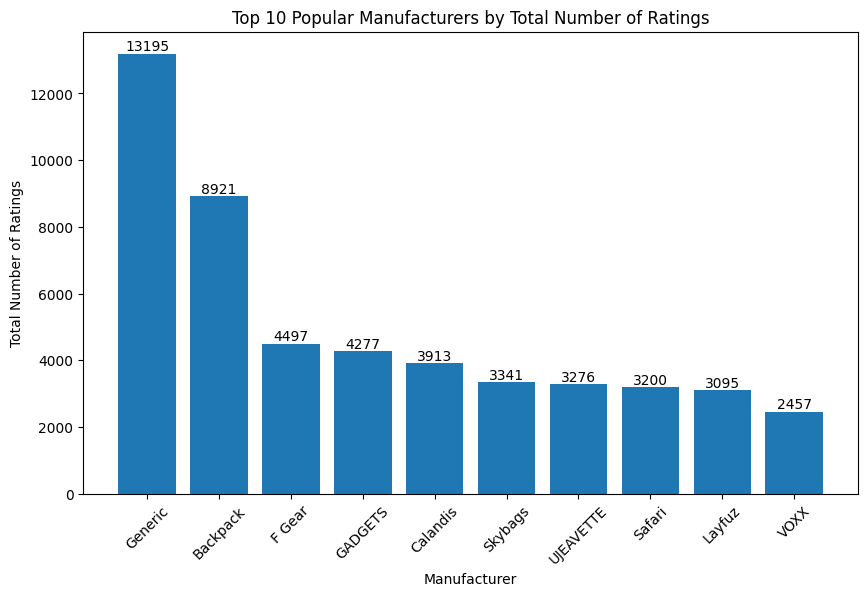

In [73]:
import matplotlib.pyplot as plt

# Sort the data by 'no_of_ratings' in descending order
sorted_data = data.sort_values(by='no_of_ratings', ascending=False)

# Get the top 10 manufacturers
top_manufacturer = sorted_data.head(10)

# Group the original data by 'manufacturer' and calculate the sum of 'no_of_ratings'
k = data.groupby('manufacturer')['no_of_ratings'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bar_plot=plt.bar(k.head(10).index, k.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Popular Manufacturers by Total Number of Ratings')
plt.xlabel('Manufacturer')
plt.ylabel('Total Number of Ratings')
# Adding labels on top of the bars
for bar, value in zip(bar_plot, k.head(10)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')
plt.show()

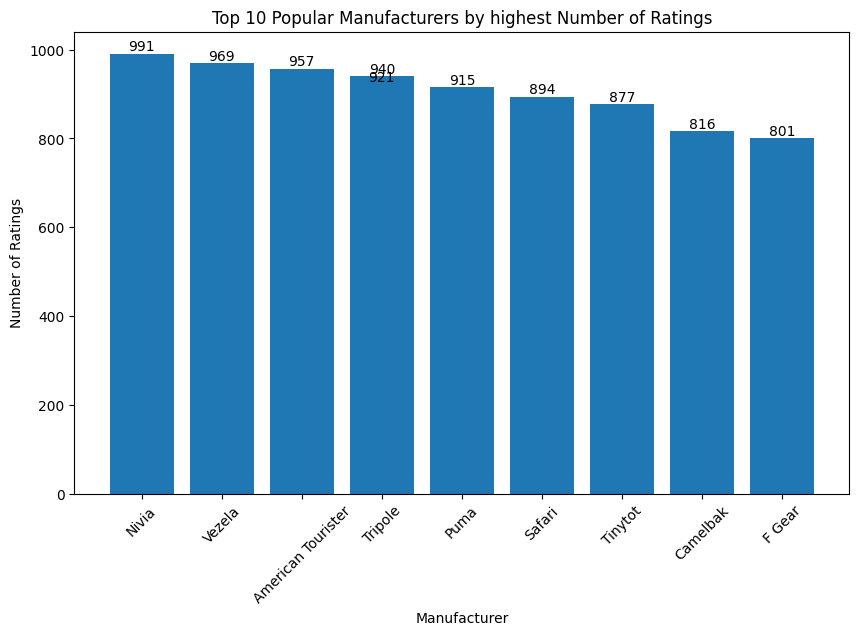

In [74]:

# Sort the data by 'no_of_ratings' in descending order
sorted_data = data.sort_values(by='no_of_ratings', ascending=False)

# Get the top 10 manufacturers
top_manufacturer = sorted_data.head(10)
top_manufacturer

import matplotlib.pyplot as plt

# Create a bar plot for the top 10 manufacturers
plt.figure(figsize=(10, 6))
plt.bar(x=top_manufacturer['manufacturer'], height=top_manufacturer['no_of_ratings'])
plt.xticks(rotation=45)
plt.title('Top 10 Popular Manufacturers by highest Number of Ratings')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Ratings')

# Adding labels on top of the bars
for index, row in top_manufacturer.iterrows():
    plt.text(row['manufacturer'], row['no_of_ratings'], str(int(row['no_of_ratings'])), ha='center', va='bottom')

plt.show()


In [75]:
#least manufacturer
least_10=data['manufacturer'].value_counts().sort_values().head(10)
print('Least 10 selling companies')
print(least_10)

Least 10 selling companies
manufacturer
Ruffler     1
Bonmaro     1
GEARONIC    1
EUME        1
Nicgid      1
S.L.        1
BAGELLO     1
LOXBEE      1
Krupa       1
Bagpack     1
Name: count, dtype: int64


In [76]:
# Assuming you've already calculated top_10
top_10 = data['manufacturer'].value_counts().sort_values(ascending=False).head(10)

# Get the manufacturer with the highest count
highest_bought_manufacturer = top_10.index[0]
print('Highest brought manufacturer:\n'+highest_bought_manufacturer)

# Filter your data to get the first highest-bought item
highest_bought_item = data[data['manufacturer'] == highest_bought_manufacturer].iloc[0]

print('First Highest-Bought Item Name:')
print(highest_bought_item['name'])

Highest brought manufacturer:
Generic
First Highest-Bought Item Name:
Generic Waterproof Camera Bag, Lightweight DSLR Backpack, Lens Accessories Carry Case for All DSLR Cameras , Laptop ,Table...


SUMMARY

The 10 companies with best sales are :

Generic      
Backpack    
GADGETS   
Calandis   
UJEAVETTE     
Layfuz        
F Gear        
VOXX          
Skybags      
Qunan         
          
After the analysis we got to know that the the best selling manufacturer is: GENERIC with 145 number of sales
The total number of ratings this manufacturer has got is 13195.
The item which is sold much by this manufacturer is Generic Waterproof Camera Bag.

The 10 companies with least sales and which has to improve are :

Ruffler     
Bonmaro     
GEARONIC    
EUME        
Nicgid      
S.L.        
BAGELLO     
LOXBEE      
Krupa       
Bagpack        



 